In [38]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import math 

In [39]:
#input variables
N = int(input("Numero de usuarios: "))
proConnect =  float(input("Probabilidad que se conecte un usuario: "))
proDisconnect =  float(input("Probabilidad que se desconecte un usuario: "))

In [40]:
#variables
P = np.zeros((N+1,N+1)) #matriz de probabilidad
expor_matriz = 'matriz_probabilidad.txt'

In [41]:
#functions
def combinatoria(n,x):
    if x > n or x < 0:
        return 0
    else:
        c = math.factorial(n)/ (math.factorial(x) * math.factorial(n-x ))
        return c

def binomial(n,x,p):
    return combinatoria(n,x) *  (p ** x) * ((1 - p)**(n - x))

# DATOS
- i: hace referencia a la cantidad de usuarios conectados en ese momento
- conn hace referencia al numero de usuarios que se pueden conectar
- nconn: numero de usuarios disponibles para conectar
- xconn: usuarios a conectar
- disc hace referencia al numero de usuarios que se pueden desconectar
- ndisc: numero de usuarios disponibles para desconectar
- xdisc: usuarios a desconectar
- n numero de usuarios que usan el ordenador

In [42]:
#code
for i in range(N+1):
    for j in range(N+1):
        #si no hay ningun usuario conectado, probabilidad que se conecten usuarios
        if i == 0:
            conn = j
            P[i][j] = binomial(N, conn, proConnect)

        #si todos los usuarios estan conectados probabilidad de desconectar usuarios
        elif i == N: 
            disc = i - j 
            P[i][j] = binomial(N, disc, proDisconnect)
        
        #si el usuario actual se desconecta entra Y uno nuevo o no hay ningun cambio
        elif i <= j:
            nconn = N - i
            ndisc = i
            xconn = j - i
            xdisc = 0
            probabilidad = 0
            
            while xconn <= nconn and xdisc <= ndisc:
                probabilidad += (binomial(nconn, xconn, proConnect)) * (binomial(ndisc, xdisc, proDisconnect))
                xconn += 1
                xdisc += 1
            
            P[i][j] = probabilidad
        
        #conectan y desconectan usuarios
        else:
            nconn = N - i
            ndisc = i
            xdisc = i - j
            xconn = 0
            probabilidad = 0

            while xconn <= nconn and xdisc <= ndisc:
                probabilidad += (binomial(nconn, xconn, proConnect)) * (binomial(ndisc, xdisc, proDisconnect))
                xconn += 1
                xdisc += 1
            
            P[i][j] = probabilidad


 Numero Usuarios:  3 
 Probabilidad de conexion:  0.4 
 Probabilidad de desconexion:  0.3


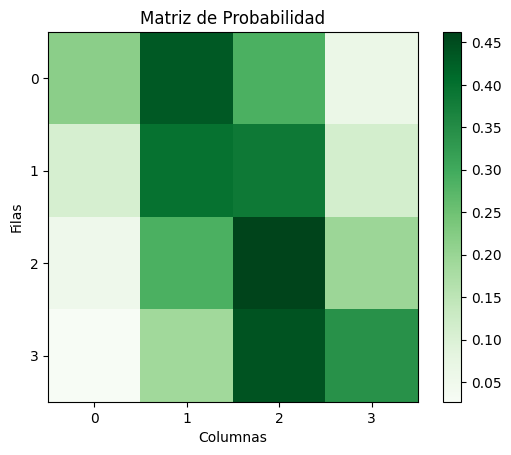

Verificacion Sumatoria Filas

fila 0:  1.0
fila 1:  0.9999999999999999
fila 2:  0.9999999999999999
fila 3:  0.9999999999999998

 Matriz de Probabilidad 

 [[0.216 0.432 0.288 0.064]
 [0.108 0.396 0.384 0.112]
 [0.054 0.288 0.462 0.196]
 [0.027 0.189 0.441 0.343]] 

Matriz guardada en matriz_probabilidad.txt


In [52]:
#info
print(" Numero Usuarios: ", N, "\n",
    "Probabilidad de conexion: ", proConnect, "\n",  
    "Probabilidad de desconexion: ", proDisconnect)

#graphics
x , y = P.shape

plt.imshow(P, cmap='Greens')    
plt.colorbar()
plt.xlabel('Columnas')
plt.xticks(range(x))
plt.ylabel('Filas')
plt.yticks(range(y))
plt.title("Matriz de Probabilidad")
plt.show()

#show sum in row
print("Verificacion Sumatoria Filas\n")
for i in range(N+1):
    suma = np.sum(P[i])
    print(f'fila {i}: ', suma)
    i += 1

#show matrix
print("\n Matriz de Probabilidad \n\n", P , "\n")

x, y = P.shape

with open(expor_matriz, 'w') as file:
    # Agregar el título
    file.write('Matriz de Probabilidad\n----------------------- \n')
    
    for i, row in enumerate(P):
        # Formatea cada fila como una cadena de números separados por tabulaciones
        row_str = '\t'.join([f'{value:.6f}' for value in row])
        
        # Agregar el número de fila antes de la fila formateada
        file.write(f'{i + 1}\t{row_str}\n')

print(f"Matriz guardada en {expor_matriz}")